In [9]:
# !pip install git+git://github.com/geopandas/geopandas.git
    
# ! pip install descartes

# ! pip install pysal

# ! pip install Rtree

import pip
# from pip import main

pip.main(['install','Rtree'])

AttributeError: module 'pip' has no attribute 'main'

In [6]:
! pip install spatialindex

Traceback (most recent call last):
  File "/opt/ibm/conda/miniconda3/bin/pip", line 7, in <module>
    from pip import main
ImportError: cannot import name 'main'


# Longitude and latitude

* Longitude are lines drawn from the north pole do the south pole, so to change in which line we are, we need to travel horizontaly
* Longitudes are x-axis


* Latitude are lines drawn parallel from the equator line, so to change in which line we are, we need to travel verticaly
* Latitude are y-axis

# Plotting chicken locations
Now you will create a scatterplot that shows where the Nashville chickens are!

* The path to the chicken dataset is in the variable chickens_path. Use the read_csv function of pandas to load it into a DataFrame called chickens.
* Use the .head() function to look at the first few rows.
* Next add the x and y arguments to plt.scatter() to plot the locations of the Nashville chickens. Use the default marker and color options.
* Show the plot using plt.show().

In [7]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt

OSError: Could not find libspatialindex_c library file

# Creating a GeoDataFrame & examining the geometry
Let's see where service districts are in Nashville. The path to the service district shapefile has been stored in the variable shapefile_path.

* Import geopandas with its common alias gpd.
* Read in the service district shapefile using geopandas and look at the first 5 rows using the head() method.
* Print the geometry field in the first row (rowname is '0') to see the data contained in that field. You will pass service_district.loc[0, 'geometry'] to the print() function to do this.

In [124]:
# ! rm council_districts.geojson*
# ! wget https://raw.githubusercontent.com/brunomurino/ML_projects/master/Courses/Visualizing%20Geospatial%20Data%20in%20Python/council_districts.geojson
# shapefile_path = 'council_districts.geojson'
# service_district = gpd.read_file(shapefile_path)





# print(service_districts.columns)
# print(school_districts.columns)
# print(neighborhoods.columns)

# Print the contents of the service districts geometry in the first row
# print(service_districts.loc[0, 'geometry'])

# Plotting shapefile polygons
The next step is to show the map of polygons. We have imported matplotlib.pyplot as plt and geopandas as gpd, A GeoDataFrame of the service districts called service_district is in your workspace.

* First plot the service districts without additonal arguments by calling .plot() on the GeoDataFrame.
* Take a look at it with plt.show(). This has been done for you.
* Now use the .plot() method again, but this time add column='name' to color the shapes according to their names and legend=True to see those names. Remember to show the plot.

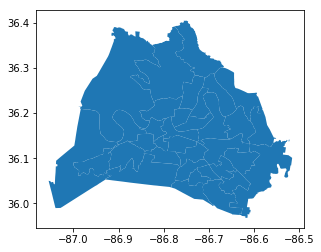

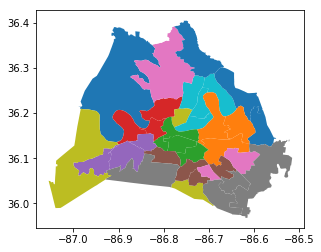

In [132]:
# Read .geojson
service_districts_url = 'https://raw.githubusercontent.com/brunomurino/ML_projects/master/Courses/Visualizing%20Geospatial%20Data%20in%20Python/council_districts.geojson'
service_districts = gpd.read_file(service_districts_url)

# Plot the Service Districts without any additional arguments
service_districts.plot()
plt.show()

# Plot the Service Districts, color them according to name
service_districts.plot(column = 'district')

plt.show()

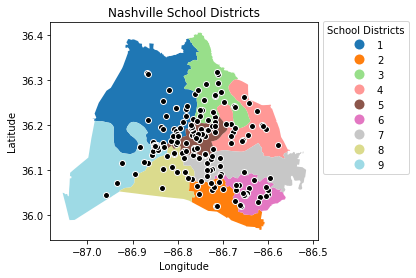

In [133]:
# Read csv file
schools_path = 'https://raw.githubusercontent.com/brunomurino/ML_projects/master/Courses/Visualizing%20Geospatial%20Data%20in%20Python/schools.csv'
schools = pd.read_csv(schools_path)

# extract latitude to a new column: lat
schools['lat'] = [float(loc.replace(",","").replace("(","").replace(")","").split()[0]) for loc in schools['Mapped Location']]

# # # extract longitude to a new column: lng
schools['lng'] = [float(loc.replace(",","").replace("(","").replace(")","").split()[1]) for loc in schools['Mapped Location']]

# Read .geojson file
school_districts_url = 'https://raw.githubusercontent.com/brunomurino/ML_projects/master/Courses/Visualizing%20Geospatial%20Data%20in%20Python/school_districts.geojson'
school_districts = gpd.read_file(school_districts_url)

# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 
    'bbox_to_anchor': (1, 1.03), 
              'ncol': 1
}

school_districts.plot(column = 'district', cmap = 'tab20', legend = True, legend_kwds = lgnd_kwds)
plt.scatter(x = schools.lng, y = schools.lat, c='k', edgecolor = 'white')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

# Changing coordinate reference systems

 * Notice that the units for geometry change when you change the CRS.
 * You always need to ensure two GeoDataFrames share the same crs before you spatially join them.

In [134]:
# Print the crs
print(school_districts.crs)

# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
                        
# Print the crs again
print(school_districts.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:3857', 'no_defs': True}


# Construct a GeoDataFrame from a DataFrame
In this exercise, you will construct a geopandas GeoDataFrame from the Nashville Public Art DataFrame. You will need to import the Point constructor from the shapely.geometry module to create a geometry column in art before you can create a GeoDataFrame from art. This will get you ready to spatially join the art data and the neighborhoods data in order to discover which neighborhood has the most art.

The Nashville Public Art data has been loaded for you as art.

In [131]:
from shapely.geometry import Point

art_path = 'https://raw.githubusercontent.com/brunomurino/ML_projects/master/Courses/Visualizing%20Geospatial%20Data%20in%20Python/public_art.csv'
art = pd.read_csv(art_path)

# Print the first few rows of the art DataFrame
print(art.columns)

# # Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# # Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
print(type(art_geo))


Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>


# Spatial Joins

In [143]:
# Read .geojson file for neighborhoods
neighborhoods_url = 'https://raw.githubusercontent.com/brunomurino/ML_projects/master/Courses/Visualizing%20Geospatial%20Data%20in%20Python/neighborhoods.geojson'
neighborhoods = gpd.read_file(neighborhoods_url)

# Before joining, check the crs
# print(neighborhoods.crs == art_geo.crs)

# Spatially join art_geo and neighborhoods 
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')

# # Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape[0])

OSError: Could not find libspatialindex_c library file